<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-01-09 21:20:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.1’

survey-results-publ 100%[===================>] 201.62M  60.5MB/s    in 3.4s    

2025-01-09 21:20:53 (60.0 MB/s) - ‘survey-results-public.sqlite.1’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [3]:
!pip install pandas

In [4]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 96.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 90.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 104.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 9.5 MB/s eta 0:00:00


In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [38]:
##Write your code here
!pip install seaborn
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.3 MB/s eta 0:00:00


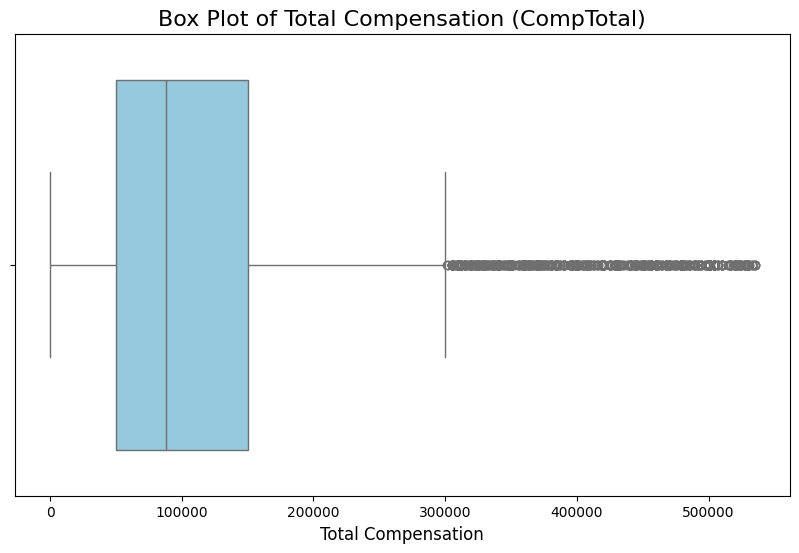

In [50]:
# your code goes here
QUERY = """
SELECT CompTotal
FROM main
"""
df_comptotal = pd.read_sql_query(QUERY, conn)

df_comptotal['CompTotal'] = pd.to_numeric(df_comptotal['CompTotal'], errors='coerce')
# df_comptotal = df_comptotal.dropna()

comp_column = 'CompTotal'
comp_data = df_comptotal[comp_column].dropna()

Q1 = df_comptotal[comp_column].quantile(0.25)
Q3 = df_comptotal[comp_column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = comp_data[(comp_data < lower_bound) | (comp_data > upper_bound)]
outliers_count = len(outliers)

cleaned_data = df_comptotal.loc[(df_comptotal[comp_column] >= lower_bound) & (df_comptotal[comp_column] <= upper_bound)]

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_data['CompTotal'], color='skyblue')

# Adding labels and title
plt.title('Box Plot of Total Compensation (CompTotal)', fontsize=16)
plt.xlabel('Total Compensation', fontsize=12)

# Show plot
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


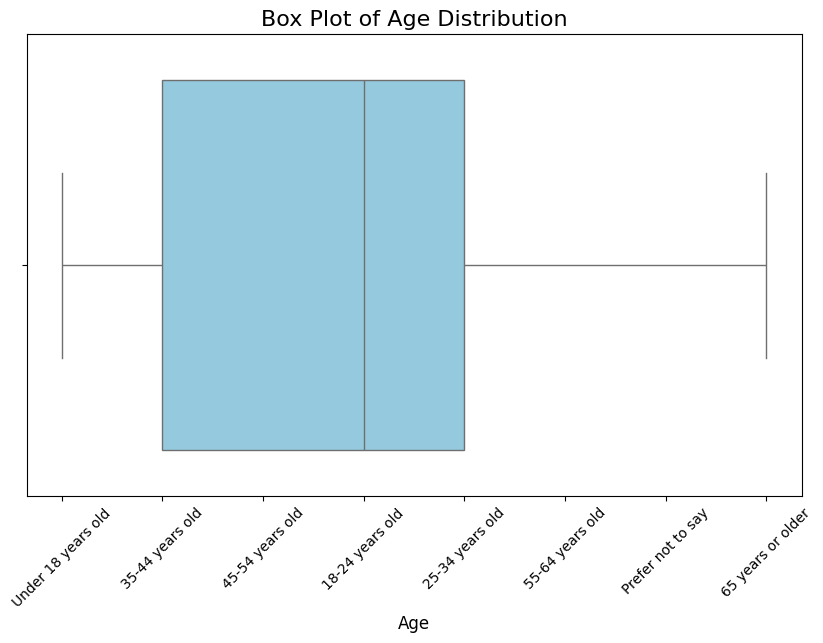

In [52]:
# your code goes here
QUERY = """
SELECT Age
FROM main
"""
df_age = pd.read_sql_query(QUERY, conn)

# Transform Age column (Example: Mapping age ranges to midpoints)
age_map = {
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65 or older': 70
}
df_age['Age_transformed'] = df_age['Age'].map(age_map)

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_age['Age'], color='skyblue')

# Adding labels and title
plt.title('Box Plot of Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


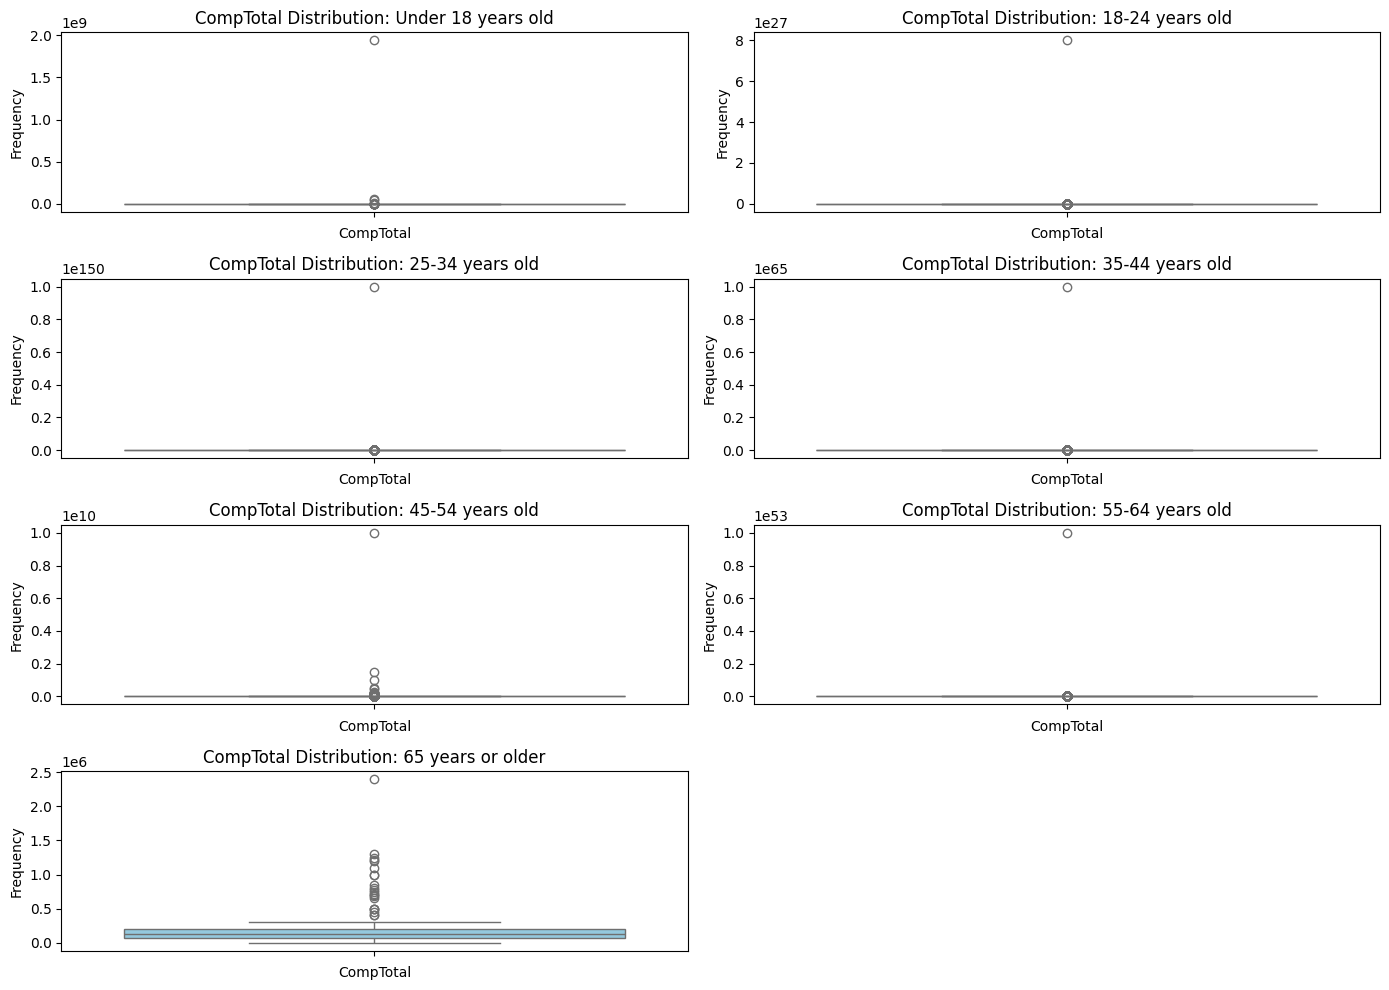

In [57]:
# your code goes here
QUERY = """
SELECT CompTotal, Age
FROM main
"""

df = pd.read_sql_query(QUERY,conn)

age_mapping = { 
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5, 
    '55-64 years old': 59.5, 
    '65 years or older': 70, 
    'Prefer not to say': None # Or choose to exclude this category
} 
# Convert Age column to numerical values
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop rows with None values in AgeNumeric
df = df.dropna(subset=['AgeNumeric'])

# Filter data for each age group and plot histograms
age_groups = { 
    'Under 18 years old': (0, 18), 
    '18-24 years old': (18, 25), 
    '25-34 years old': (25, 35), 
    '35-44 years old': (35, 45), 
    '45-54 years old': (45, 55), 
    '55-64 years old': (55, 65), 
    '65 years or older': (65, 100) 
}
plt.figure(figsize=(14, 10))

for i, (label, (min_age, max_age)) in enumerate(age_groups.items(), 1):
    age_group_df = df[(df['AgeNumeric'] >= min_age) & (df['AgeNumeric'] < max_age)]
    plt.subplot(4, 2, i)
    sns.boxplot(age_group_df['CompTotal'].dropna(), color='skyblue')
    plt.title(f'CompTotal Distribution: {label}')
    plt.xlabel('CompTotal')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<function matplotlib.pyplot.show(close=None, block=None)>

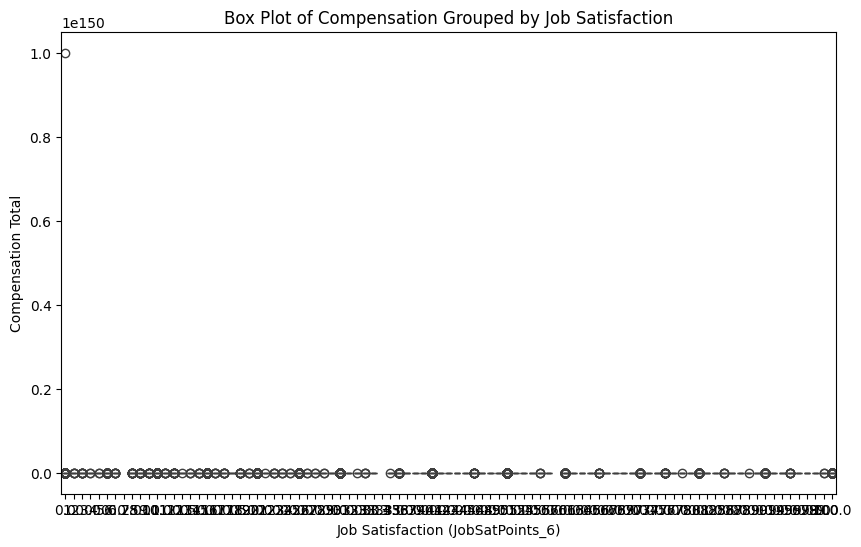

In [58]:
# your code goes here
QUERY = """
SELECT CompTotal, JobSatPoints_6
FROM main
"""
df_jobsat = pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df_jobsat) 
plt.title('Box Plot of Compensation Grouped by Job Satisfaction')
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Compensation Total')
plt.show

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [66]:
QUERY = """
SELECT *
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

column_headers = df.columns.tolist()
print(df['DevType'])

0                         None
1        Developer, full-stack
2         Developer Experience
3        Developer, full-stack
4        Developer, full-stack
                 ...          
65432               Blockchain
65433                     None
65434        Developer, mobile
65435      Developer, back-end
65436                     None
Name: DevType, Length: 65437, dtype: object


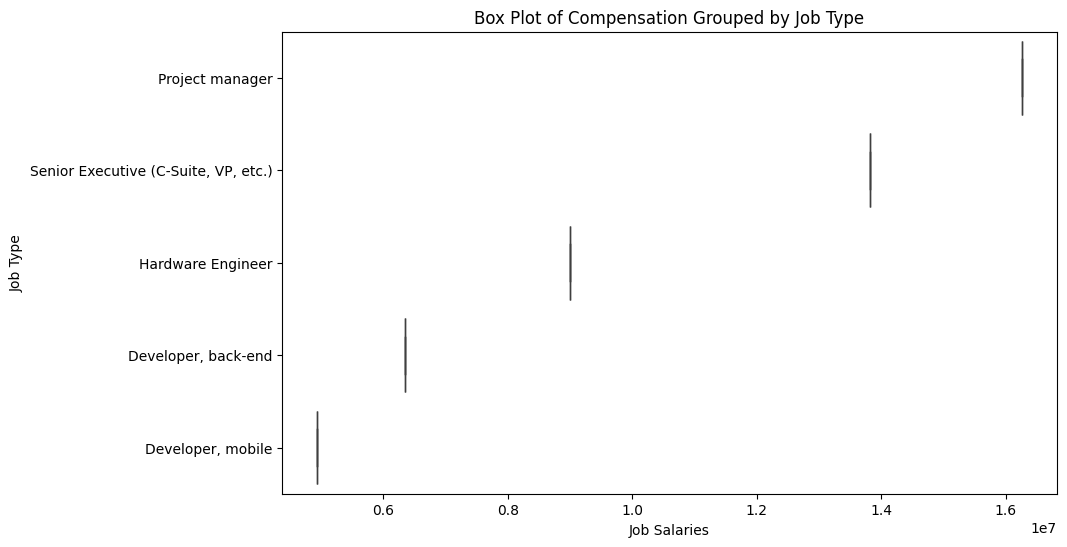

In [71]:
# your code goes here
QUERY = """
SELECT ConvertedCompYearly, DevType
FROM main
GROUP BY ConvertedCompYearly, DevType
ORDER BY ConvertedCompYearly desc
LIMIT 5
"""

df_top_salaries = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
sns.boxplot(x='ConvertedCompYearly', y='DevType', data=df_top_salaries) 
plt.title('Box Plot of Compensation Grouped by Job Type')
plt.xlabel('Job Salaries')
plt.ylabel('Job Type')
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


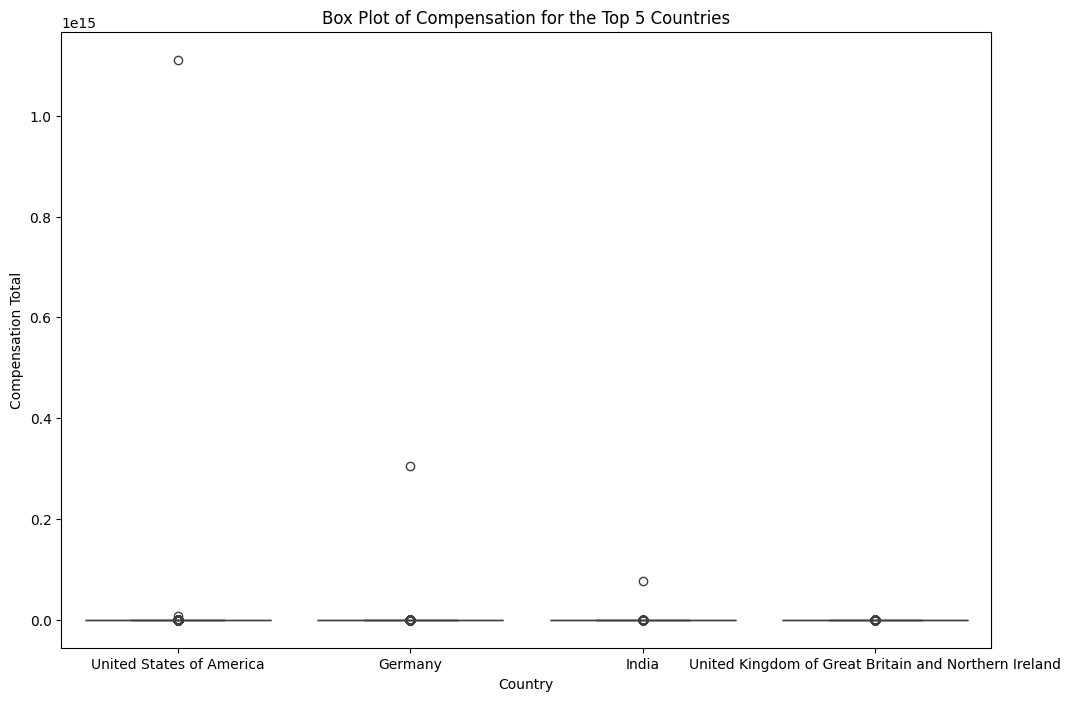

In [82]:
# your code goes here
cursor = conn.cursor()
query_top_countries = """ SELECT Country, COUNT(*) as RespondentCount
FROM main
GROUP BY Country
ORDER BY RespondentCount DESC 
LIMIT 5 
"""
cursor.execute(query_top_countries)
top_countries = [row[0] for row in cursor.fetchall()]

query_compensation = f"""
SELECT CompTotal, Country
FROM main
WHERE Country IN ({', '.join('?' * len(top_countries))})
"""
cursor.execute(query_compensation, top_countries)
data = cursor.fetchall()

df = pd.DataFrame(data, columns=['CompTotal', 'Country'])
countries_ordered = df['Country'].value_counts().index.tolist()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='CompTotal', data=df, order=countries_ordered)
plt.title('Box Plot of Compensation for the Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Compensation Total')
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


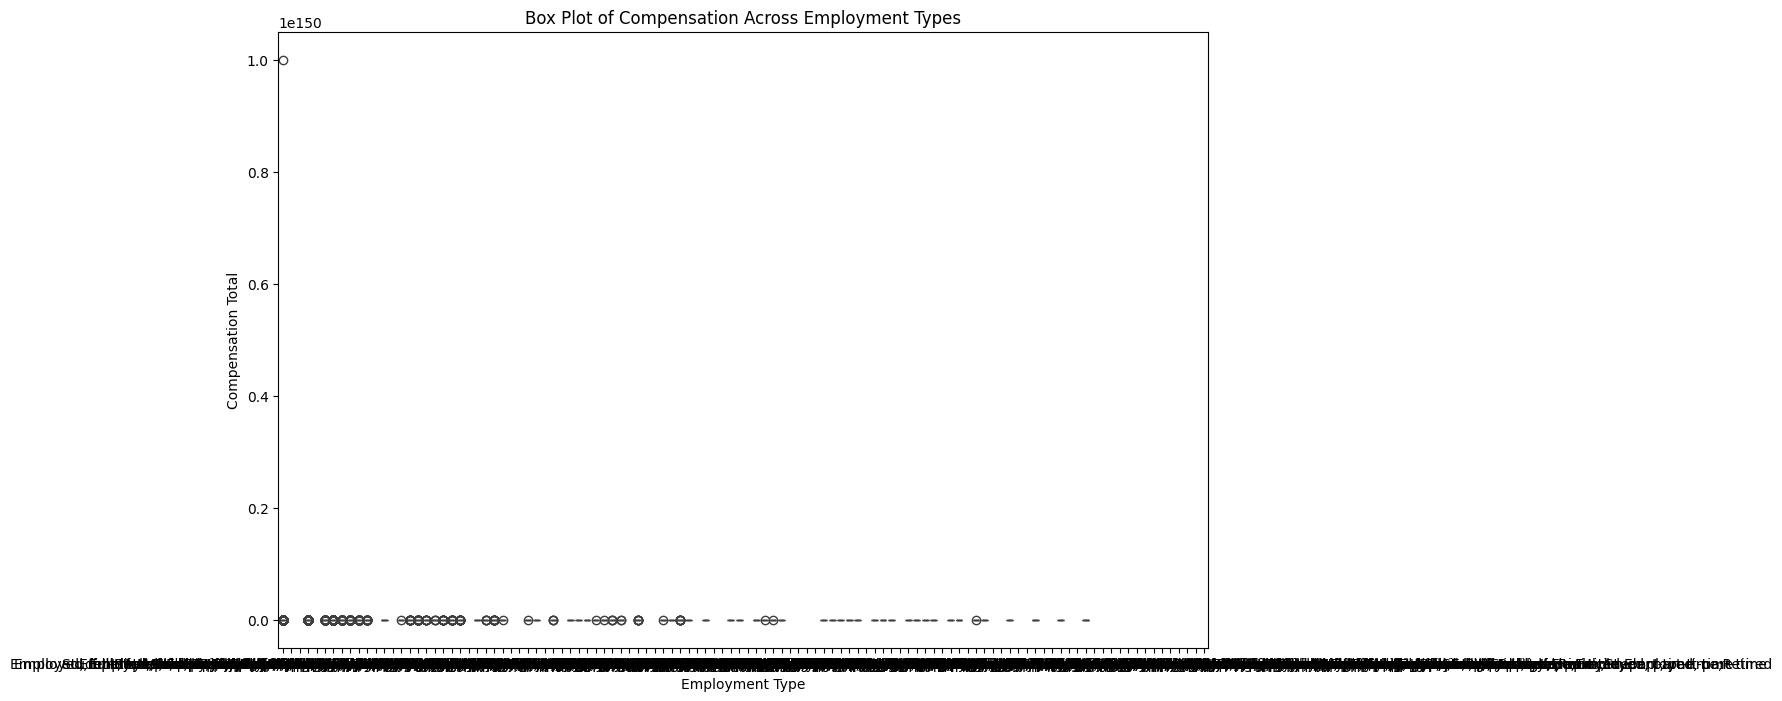

In [87]:
# your code goes here
cursor = conn.cursor()

query = """ 
SELECT CompTotal, Employment
FROM main
""" 
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['CompTotal', 'EmploymentType'])
plt.figure(figsize=(12, 8))
sns.boxplot(x='EmploymentType', y='CompTotal', data=df)
plt.title('Box Plot of Compensation Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Compensation Total')
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:
# your code goes here
## Write your code here
QUERY = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

df['YearsCodePro'] = df['YearsCodePro'].replace({ 'Less than 1 year': 0, 'More than 50 years': 51 }).apply(pd.to_numeric, errors='coerce')

df = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['JobSat'], bins=30, edgecolor='black', color='skyblue')
plt.title('Histogram of Job Satisfaction (JobSat) by Years of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
